# About Delhivery  

**Delhivery** is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021.  
Their mission is to build the **operating system for commerce**, leveraging:  
- World-class **infrastructure**  
- **Logistics operations** of the highest quality  
- Cutting-edge **engineering** and **technology** capabilities  

The **Data Team** plays a pivotal role in achieving this by:  
- Building intelligence and capabilities using data  
- Enhancing the quality, efficiency, and profitability of their business compared to competitors  

---

## Problem Statement  

Delhivery aims to understand and process the data flowing from their data engineering pipelines. Here's how you can contribute:  

1. **Clean, sanitize, and manipulate data** to extract useful features from raw fields  
2. Derive insights from raw data to support the Data Science team in building **forecasting models**  

---


# Column Profiling

## Data Dictionary

- **data**: Indicates whether the data belongs to testing or training datasets.  
- **trip_creation_time**: Timestamp of when the trip was created.  
- **route_schedule_uuid**: Unique identifier for a particular route schedule.  
- **route_type**: Describes the transportation type:
    - **FTL (Full Truck Load)**: FTL shipments reach the destination sooner, as the truck makes no other pickups or drop-offs along the way;
    - **Carting**: A handling system consisting of small vehicles (carts).  
- **trip_uuid**: Unique ID assigned to a specific trip. A trip may include different source and destination centers.  
- **source_center**: Unique identifier (ID) for the origin of the trip.  
- **source_name**: Name of the trip's origin.  
- **destination_center**: Unique identifier (ID) for the destination of the trip.  
- **destination_name**: Name of the trip's destination.  
- **od_start_time**: Start time of the trip.  
- **od_end_time**: End time of the trip.  
- **start_scan_to_end_scan**: Total time taken to deliver from source to destination.  
- **is_cutoff**: Unknown field.  
- **cutoff_factor**: Unknown field.  
- **cutoff_timestamp**: Unknown field.  
- **actual_distance_to_destination**: Distance in kilometers between the source and destination warehouses.  
- **actual_time**: Actual cumulative time taken to complete the delivery.  
- **osrm_time**: Cumulative time calculated by an open-source routing engine, which computes the shortest path between points on a map. It includes usual traffic conditions and distances through major and minor roads.  
- **osrm_distance**: Cumulative distance calculated by an open-source routing engine, representing the shortest path between points on a map. It includes usual traffic conditions and distances through major and minor roads.  
- **factor**: Unknown field.  
- **segment_actual_time**: Actual time taken by a specific segment (subset) of the package delivery.  
- **segment_osrm_time**: OSRM-calculated time for a specific segment (subset) of the package delivery.  
- **segment_osrm_distance**: OSRM-calculated distance for a specific segment (subset) of the package delivery.  
- **segment_factor**: Unknown field.


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset and making a copy of it so that original can be intact

original_data = pd.read_csv("delhivery_data.csv")
data = original_data.copy(deep= True)
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
# Knowing the Shape of the data
print(f"Number of Rows in given DataSet: {data.shape[0]}")
print(f"Number of Columns in given DataSet: {data.shape[1]}")

Number of Rows in given DataSet: 144867
Number of Columns in given DataSet: 24


In [4]:
# Columns and their dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
# percentage of null values
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [6]:
# Duplicated values
print(f"Duplicated_values: {data.duplicated().sum()}")

Duplicated_values: 0


In [7]:
# Checking Unique Values
data.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

## Summary of Current Data

- **Shape**: There are total 144867 rows and 24 columns in the dataset where most the columns are unknown
- **Null Values:** There are few null values in the dataset which we can deal with them later as they are having impact of less than 0.2%. We can either drop them or fill them with most frequent value.
- **Duplicate Rows:** There are no such duplicate values that have same values in all columns in the dataset.
- **Unique_values:** There are only 3 columns which have 2 unique values, we can categorize data using them whenever it is necessary
- **Mysterious Columns**: There are few unknown columns in the dataset which we don't know what to do with them. But we can deal with them later we can remove those columns if they interfere in EDA.
- **DateTime Columns:** We have few columns that can be convert into datetime format using pandas for ease in Data Analysis.<br><br>
**Let's Deal with abnormal data one by one**

In [8]:
data.iloc[:2, :15]
# using iloc you can also check hidden cols. for rows iloc:3 gets first 3 rows(012), for cols iloc=0 is index ie 0,1,2 so on.

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55


In [9]:
# there are few cols that have date & time in it but they are as object dtype.

datetime_cols = ['trip_creation_time','od_start_time',
                 'od_end_time','cutoff_timestamp']

# let's convert them into datetime format
for col in datetime_cols:
    data[col] = pd.to_datetime(data[col], format='mixed')

#verify
data[datetime_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trip_creation_time  144867 non-null  datetime64[ns]
 1   od_start_time       144867 non-null  datetime64[ns]
 2   od_end_time         144867 non-null  datetime64[ns]
 3   cutoff_timestamp    144867 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.4 MB


In [10]:
# Null data percentage is less than 0.2% we can remove those rows or we can replace them with more frequent value
# For now let's just drop it

data.dropna(inplace=True, axis= 0, how='any')

# axis=0 removes the rows, subset= check in only that col, thresh= no of rows to be deleted
# how= 'all'(if all values null) or 'any'(if any value is null)

data.isna().sum() # verify

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

### Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

### Create a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center, and destination_center and name it as segment_key.

In [11]:
# creating a new column as segmentkey by combining the below columns to group easily
data['segment_key'] = data["trip_uuid"]+"_"+data["source_center"]+"_"+data['destination_center']

In [12]:
aggregated_data = data.groupby(by=['segment_key']).agg(
    segment_actual_time_sum= ("segment_actual_time", "sum"),
    segment_osrm_time_sum = ("segment_osrm_time","sum"),
    segment_osrm_distance_sum = ("segment_osrm_distance","sum")).reset_index()

aggregated_data.head()

,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,728.0,534.0,670.6205
1,trip-153671041653548748_IND462022AAA_IND209304AAA,820.0,474.0,649.8528
2,trip-153671042288605164_IND561203AAB_IND562101AAA,46.0,26.0,28.1995
3,trip-153671042288605164_IND572101AAA_IND561203AAB,95.0,39.0,55.9899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,608.0,231.0,317.7408


In [13]:
data['cumsum_segment_actual_time'] = data.groupby('segment_key')['segment_actual_time'].cumsum()
data['cumsum_segment_osrm_time'] = data.groupby('segment_key')['segment_osrm_time'].cumsum()
data['cumsum_segment_osrm_distance'] = data.groupby('segment_key')['segment_osrm_distance'].cumsum()

data.head(20)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,44.0,49.4772
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,21.2890,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320_IND388620AAB_IND388320AAA,43.0,17.0,21.2890
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,35.8252,2.241379,21.0,11.0,14.5362,1.909091,trip-153741093647649320_IND388620AAB_IND388320AAA,64.0,28.0,35.8252
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,47.1900,1.948718,10.0,10.0,11.3648,1.000000,trip-153741093647649320_IND388620AAB_IND388320AAA,74.0,38.0,47.1900
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,53.2334,2.266667,26.0,6.0,6.0434,4.333333,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,44.0,53.2334


## 2: Aggregating at Segment Level

- **a. Create a dictionary**: Define a dictionary named `create_segment_dict` to specify how to aggregate and select values:  
  - Use the **first** and **last values** for some numeric/categorical fields where aggregation doesn’t make sense.  

- **b. Group the data by `segment_key`**: Group the data to perform aggregation operations for different segments of each trip based on the `segment_key` value.  

- **c. Apply aggregation functions**: Use the aggregation functions defined in `create_segment_dict` for each group of rows sharing the same `segment_key`.  

- **d. Sort the resulting DataFrame**:  
  - **i. Sort by `segment_key`**: Ensures segments are ordered consistently.  
  - **ii. Sort by `od_end_time` (ascending)**: Ensures segments within the same trip are ordered by their end times from earliest to latest.  


In [14]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'cumsum_segment_actual_time', 'cumsum_segment_osrm_time',
       'cumsum_segment_osrm_distance'],
      dtype='object')

### Why Define Aggregation Rules?

When rows represent parts of a larger entity (e.g., segments of a delivery trip), condensing them into one row per group (e.g., one row per segment) is essential. During this process:

- **Numeric Fields**: Represent totals, averages, or other summaries.  
- **Categorical Fields**: Require a meaningful representation, such as the first or most frequent value.  
- **Timestamps**: Must maintain chronological relevance, such as start and end times.  

Without proper aggregation rules:  
- The resulting data might lose important context.  
- It may become inconsistent, reducing its usefulness for analysis or modeling.  


In [15]:
create_segment_dict = {

    'data': "first",
    'trip_creation_time': "first",
    'route_schedule_uuid': "first",
    'route_type': "first",
    'trip_uuid': "first",
    'source_center': "first",
    'source_name': "first",

    'destination_center': "last",
    'destination_name': "last",

    'od_start_time': "first",
    'od_end_time': "first",
    'start_scan_to_end_scan': "first",

    'actual_distance_to_destination': "last",
    'actual_time': "last",

    'osrm_time': "first",
    'osrm_distance': "first",

    'cumsum_segment_actual_time': "last",
    'cumsum_segment_osrm_time': "last",
    'cumsum_segment_osrm_distance': "last"
}

In [16]:
segmented_data = data.groupby(by= 'segment_key').agg(create_segment_dict).reset_index()

In [17]:
# sorting the data by segment_key: Ensuring segments are ordered consistently.
# Sorting by od_end_time (ascending): Ensures segments within the same trip are ordered by their end times from earliest to latest.

segmented_data = segmented_data.sort_values(by=['segment_key', 'od_end_time'], ascending = [True, True])
segmented_data.head(20)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,33.0,38.0620,728.0,534.0,670.6205
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,39.0,55.2597,820.0,474.0,649.8528
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,10.0,10.8633,46.0,26.0,28.1995
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,8.0,10.3544,95.0,39.0,55.9899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,19.0,27.2834,608.0,231.0,317.7408
5,trip-153671043369099517_IND562132AAA_IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,27.0,30.0119,2700.0,1710.0,2227.5270
6,trip-153671046011330457_IND400072AAB_IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,9.0,11.9675,59.0,16.0,19.8766
7,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,59.530350,147.0,17.0,23.8920,147.0,45.0,63.6461
8,trip-153671052974046625_IND583119AAA_IND583101AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,485.0,41.317614,131.0,18.0,24.5223,130.0,44.0,53.5761
9,trip-153671052974046625_IND583201AAA_IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,26.600536,63.0,21.0,23.5892,63.0,26.0,29.5697


In [18]:
segmented_data.shape

(26222, 20)

In [19]:
segmented_data[segmented_data['trip_uuid'] == 'trip-153741093647649320']

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
10370,trip-153741093647649320_IND388121AAA_IND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,11.0,11.9653,67.0,44.0,49.4772
10371,trip-153741093647649320_IND388620AAB_IND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,11.0,12.1171,100.0,44.0,53.2334


In [20]:
segmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [21]:
segmented_data.nunique()

segment_key                       26222
data                                  2
trip_creation_time                14787
route_schedule_uuid                1497
route_type                            2
trip_uuid                         14787
source_center                      1496
source_name                        1496
destination_center                 1466
destination_name                   1466
od_start_time                     26222
od_end_time                       26222
start_scan_to_end_scan             1914
actual_distance_to_destination    26193
actual_time                        1657
osrm_time                           150
osrm_distance                     24511
cumsum_segment_actual_time         1676
cumsum_segment_osrm_time           1102
cumsum_segment_osrm_distance      25948
dtype: int64

### 3. Feature Engineering

Extract features from the following fields:

1. **Calculate time difference**:  
   - Compute the time taken between `od_start_time` and `od_end_time`.  
   - Store the result as a new feature named `od_time_diff_hour`.  
   - Drop the original columns, if required.  

2. **Destination Name**:  
   - Split and extract features from `destination_name` in the format: **City-Place-Code (State)**.  

3. **Source Name**:  
   - Split and extract features from `source_name` in the format: **City-Place-Code (State)**.  

4. **Trip_creation_time**:  
   - Extract temporal features such as **month**, **year**, **day**, etc.  


In [22]:
segmented_data["od_time_diff_hour"] = (segmented_data['od_end_time'] - segmented_data['od_start_time']).dt.total_seconds()/3600

In [23]:
# Let's drop the `od_start_time` and `od_end_time` columns

segmented_data.drop(labels= ['od_start_time', 'od_end_time'], axis= 1, inplace= True)
segmented_data.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,33.0,38.0620,728.0,534.0,670.6205,21.010074
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,39.0,55.2597,820.0,474.0,649.8528,16.658423
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,10.0,10.8633,46.0,26.0,28.1995,0.980540
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,8.0,10.3544,95.0,39.0,55.9899,2.046325
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,19.0,27.2834,608.0,231.0,317.7408,13.910649


In [24]:
# Split and extract features from `destination_name` in the format: City-Place-Code (State)
import re

def extract_state(value): #to extract state from the name
    part1, state = value.split('(')
    state = state[:-1]
    return part1, state

def split_values(value):
    parts = re.split(r"[\s_]+",value, maxsplit= 2)
    if len(parts) == 3:
        return parts[0], parts[1], parts[2]  # city, place, code
    elif len(parts) == 2:
        return parts[0], parts[1], None  # city, place, None for missing code
    elif len(parts) == 1:
        return parts[0], None, None  # city, None, None for missing place and code

In [25]:
# let's apply the functions to Source column

segmented_data[['source_place_city_code', 'source_state']]= segmented_data['source_name'].apply(extract_state).apply(pd.Series)

segmented_data[['source_city','source_place','source_code']]= segmented_data['source_place_city_code'].apply(split_values).apply(pd.Series)

In [26]:
# let's apply the functions to destination column

segmented_data[['destination_place_city_code', 'destination_state']]= segmented_data['destination_name'].apply(extract_state).apply(pd.Series)

segmented_data[['destination_city','destination_place','destination_code']]= segmented_data['destination_place_city_code'].apply(split_values).apply(pd.Series)

In [27]:
# drop the extra columns also the original source and desitnation columns as we have that data with us.

segmented_data.drop(labels=['source_place_city_code','destination_place_city_code' ], axis=1, inplace= True)

In [28]:
# Trip_creation_time: Extract features like month, year, day, etc.

segmented_data['trip_creation_day'] = segmented_data['trip_creation_time'].dt.day
segmented_data['trip_creation_month'] = segmented_data['trip_creation_time'].dt.month
segmented_data['trip_creation_year'] = segmented_data['trip_creation_time'].dt.year

In [29]:
segmented_data.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,trip_creation_day,trip_creation_month,trip_creation_year
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,Kanpur,Central,H_6,Haryana,Gurgaon,Bilaspur,HB,12,9,2018
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,Bhopal,Trnsport,H,Uttar Pradesh,Kanpur,Central,H_6,12,9,2018
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D,12,9,2018
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D,12,9,2018
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,Gurgaon,Bilaspur,HB,Punjab,Chandigarh,Mehmdpur,H,12,9,2018


In [30]:
# there are few categorical columns in the dataframe let's identify them and convert them to categorical
cat_cols= ["data", "route_type"]

for col in segmented_data.columns:
    if 'state' in col or 'place' in col or 'code' in col or 'city' in col:
        segmented_data[col] = segmented_data[col].astype('category')

for col in cat_cols:
    segmented_data[col] = segmented_data[col].astype('category')

segmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  category      
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  category      
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  start_scan_to_end_scan          26222 non-null  float64       
 11  ac

In [31]:
# after applying the functions we got few null values in code columns
segmented_data.isna().sum()

segment_key                         0
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                         0
destination_center                  0
destination_name                    0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
cumsum_segment_actual_time          0
cumsum_segment_osrm_time            0
cumsum_segment_osrm_distance        0
od_time_diff_hour                   0
source_state                        0
source_city                         0
source_place                        0
source_code                       342
destination_state                   0
destination_city                    0
destination_place                   0
destination_

Source Code and desitnation code have few null values init. As it doesn't have much use as of now, we can either drop that column or we can change it accordance with place values. But for now let's just ignore it. It's doesn't have any impact on further analysis.

## 4. In-Depth Analysis

### 1. Grouping and Aggregating at Trip-Level
- **a. Group by `trip_uuid`**:  
  Group the segment data by the `trip_uuid` column to focus on aggregating data at the trip level.  

- **b. Apply aggregation functions**:  
  Use aggregation functions like `first`, `last`, and `sum` as specified in the `create_trip_dict` dictionary to calculate summary statistics for each trip.  

In [32]:
create_trip_dict = {

    'data': "first",
    'trip_creation_time': "first",
    'route_schedule_uuid': "first",
    'route_type': "first",
    'trip_uuid': "first",

    'source_center': "first",
    'source_name': "first",
    'source_city' : "first",
    'source_place': 'first',
    'source_state': 'first',

    'destination_center': "last",
    'destination_name': "last",
    'destination_city': 'last',
    'destination_place': 'last',
    'destination_state': 'last',

    'start_scan_to_end_scan': "sum",
    'od_time_diff_hour': 'sum',


    'actual_distance_to_destination': "sum",
    'actual_time': "sum",

    'osrm_time': "sum",
    'osrm_distance': "sum",

    'cumsum_segment_actual_time': "sum",
    'cumsum_segment_osrm_time': "sum",
    'cumsum_segment_osrm_distance': "sum"
}

trip_level_data = segmented_data.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop= True)

In [33]:
trip_level_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_city,source_place,source_state,...,destination_state,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Central,Uttar Pradesh,...,Uttar Pradesh,2259.0,37.668497,824.732854,1562.0,72.0,93.3217,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,ChikaDPP,Karnataka,...,Karnataka,180.0,3.026865,73.186911,143.0,18.0,21.2177,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,Haryana,...,Haryana,3933.0,65.572709,1927.404273,3347.0,46.0,57.2953,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai,Hub,Maharashtra,...,Maharashtra,100.0,1.674916,17.175274,59.0,9.0,11.9675,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,Dc,Karnataka,...,Karnataka,717.0,11.972484,127.448500,341.0,56.0,72.0035,340.0,115.0,146.7919


In [34]:
# there are few categorical columns in the dataframe let's identify them and convert them to categorical
cat_cols= ["data", "route_type"]

for col in trip_level_data.columns:
    if 'state' in col or 'place' in col or 'code' in col or 'city' in col:
        trip_level_data[col] = trip_level_data[col].astype('category')

for col in cat_cols:
    trip_level_data[col] = trip_level_data[col].astype('category')

trip_level_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   source_city                     14787 non-null  category      
 8   source_place                    14787 non-null  category      
 9   source_state                    14787 non-null  category      
 10  destination_center              14787 non-null  object        
 11  de

In [35]:
trip_level_data.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14787,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
start_scan_to_end_scan,14787.0,529.429025,23.0,149.0,279.0,632.0,7898.0,658.254936
od_time_diff_hour,14787.0,8.838559,0.391024,2.494975,4.661846,10.558962,131.642533,10.973591
actual_distance_to_destination,14787.0,164.090196,9.002461,22.777099,48.287894,163.591258,2186.531787,305.502982
actual_time,14787.0,356.306012,9.0,67.0,148.0,367.0,6265.0,561.517936
osrm_time,14787.0,36.193887,6.0,13.0,21.0,45.0,1611.0,41.555735
osrm_distance,14787.0,40.698444,9.051,12.94055,24.4979,53.29315,2191.4037,49.328946
cumsum_segment_actual_time,14787.0,353.059174,9.0,66.0,147.0,364.0,6230.0,556.365911
cumsum_segment_osrm_time,14787.0,180.511598,6.0,30.0,65.0,184.0,2564.0,314.679279
cumsum_segment_osrm_distance,14787.0,222.705466,9.0729,32.57885,69.7842,216.5606,3523.6324,416.846279


In [36]:
trip_level_data.describe(include=[ 'object', 'category']).T

,count,unique,top,freq
data,14787,2,training,10645
route_schedule_uuid,14787,1497,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14787,2,Carting,8906
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
source_city,14787,714,Gurgaon,1128
source_place,14787,710,Bilaspur,1074
source_state,14787,29,Maharashtra,2714
destination_center,14787,1035,IND000000ACB,821


### **Insights and Observations:**

1. **Training vs Test Data**: Most data is from the "training" set (10,645 records). Ensure both datasets are balanced for model validation.  
2. **Route Data**: 1,497 unique routes, with some routes used more frequently (53 times). Focus on optimizing the most common routes.  
3. **Route Type**: "Carting" is the most common type (8,906 occurrences). Analyze operational factors to improve efficiency in this category.  
4. **Unique Trips**: Each trip is unique (14,787 different trip UUIDs). Track individual trips for performance and optimization.  
5. **Source & Destination Locations**: Common source cities include "Gurgaon" and destination cities like "Mumbai". Focus on improving operations in these high-demand areas. Maharashtra is the most frequent source and destination state, suggesting a regional focus for improvements.

---

### **Actionable Items:**

1. **Route Optimization**: Focus on high-frequency routes to optimize delivery times and reduce costs.  
2. **Resource Allocation**: Ensure that high-usage centers (like "Gurgaon_Bilaspur_HB") are well-resourced for efficient operations.  
3. **Focus on High-Demand Areas**: Prioritize improvements in cities/states with high delivery volumes (e.g., Mumbai, Maharashtra).  
4. **Segment Data by Route Type**: Analyze "Carting" performance and compare it with other route types to identify improvement opportunities.  
5. **Geospatial Analysis**: Visualize delivery data on a map to optimize fleet distribution and reduce delivery time.  
6. **Performance at Source Locations**: Review and optimize operations at common source locations (e.g., "Gurgaon") to reduce delays.  
7. **Handling Rare Locations**: Investigate uncommon source/destination centers for efficient handling.  
8. **Data Consistency**: Check for mismatches in source and destination locations to ensure data accuracy.

---

##### **Conclusion**: By focusing on high-frequency routes, locations, and optimizing the "Carting" type, Delhivery can improve operational efficiency, reduce costs, and ensure better resource allocation


### 2. Outlier Detection & Treatment
- **a. Identify outliers**:  
  Detect existing outliers in numerical features.  

- **b. Visualize outliers**:  
  Use **Boxplot** to visualize the outlier values.  

- **c. Handle outliers**:  
  Address outliers using the **IQR method** (Interquartile


In [37]:
# Let's get the numerical cols from the dataframe and check for outliers
numerical_features = []


for col in trip_level_data.columns:
    if trip_level_data[col].dtypes=='float64':
        numerical_features.append(col)

numerical_features

['start_scan_to_end_scan',
 'od_time_diff_hour',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'cumsum_segment_actual_time',
 'cumsum_segment_osrm_time',
 'cumsum_segment_osrm_distance']

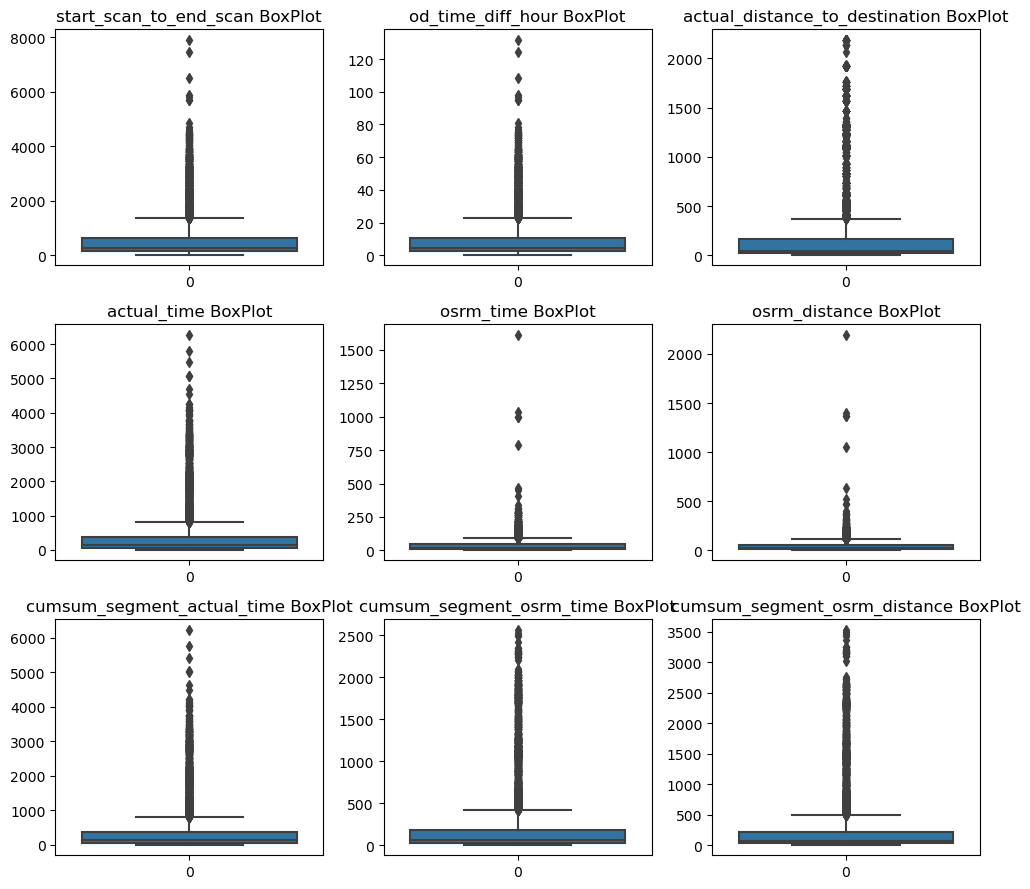

In [38]:
# Detecting outliers in numberical features using Boxplot

plt.figure(figsize= (10,9))

for i,col in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.boxplot(trip_level_data[col])
    plt.title(f"{col} BoxPlot")


plt.tight_layout()
plt.show()


### There are huge number of outliers in the Numerical Columns, Let's get the total count and percentage of those outliers

In [39]:
# let's know how much space are outliers taking in the data set.

for col in numerical_features:
    q1 = trip_level_data[col].quantile(0.25)
    q3 = trip_level_data[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    no_of_outliers = len(trip_level_data[(trip_level_data[col] <= lower_bound )|( trip_level_data[col] >= upper_bound)])

    print(f"The \033[1m{col}\033[0m has {no_of_outliers} number of outliers in it")
    percent = no_of_outliers/len(trip_level_data)
    print(f"The total pecentage of outliers is {np.round(percent*100,2)}%\n")

The start_scan_to_end_scan has 1282 number of outliers in it
The total pecentage of outliers is 8.67%

The od_time_diff_hour has 1275 number of outliers in it
The total pecentage of outliers is 8.62%

The actual_distance_to_destination has 1452 number of outliers in it
The total pecentage of outliers is 9.82%

The actual_time has 1648 number of outliers in it
The total pecentage of outliers is 11.14%

The osrm_time has 1229 number of outliers in it
The total pecentage of outliers is 8.31%

The osrm_distance has 995 number of outliers in it
The total pecentage of outliers is 6.73%

The cumsum_segment_actual_time has 1646 number of outliers in it
The total pecentage of outliers is 11.13%

The cumsum_segment_osrm_time has 1492 number of outliers in it
The total pecentage of outliers is 10.09%

The cumsum_segment_osrm_distance has 1550 number of outliers in it
The total pecentage of outliers is 10.48%



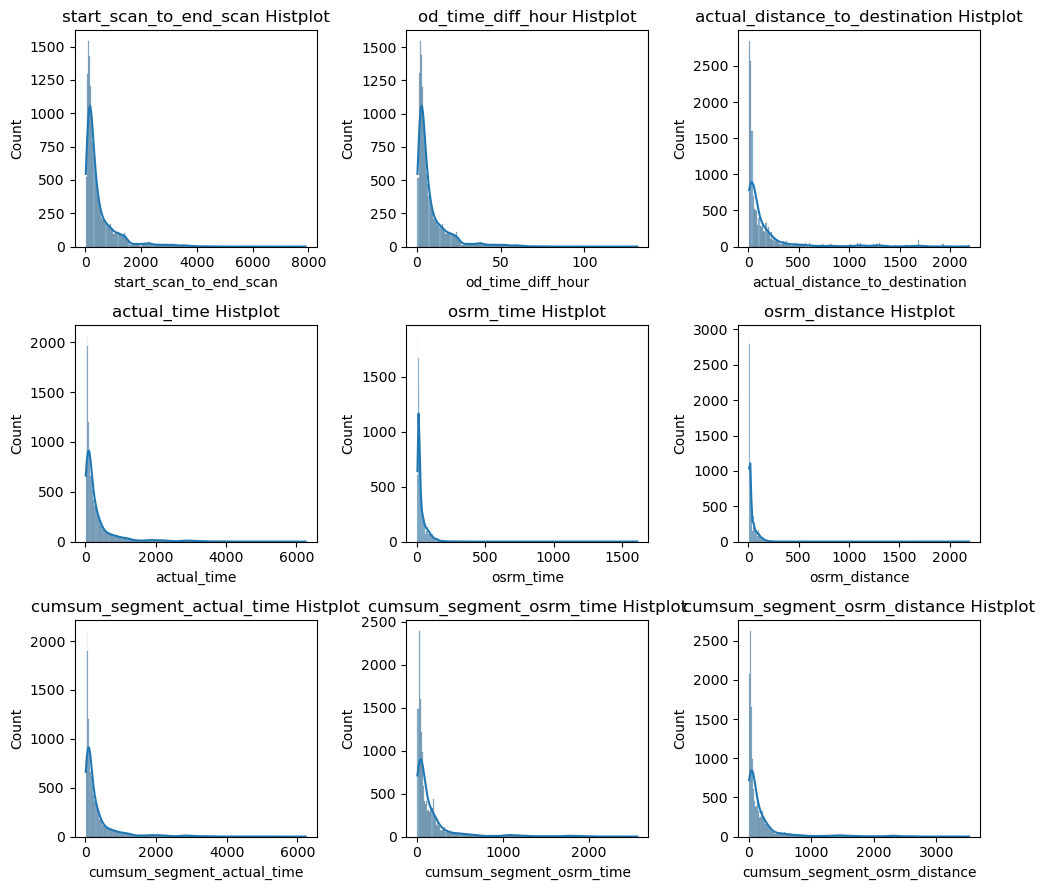

In [40]:
# let's check the distribution of the data

plt.figure(figsize= (10,9))

for i,col in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.histplot(trip_level_data[col], kde= True)
    plt.title(f"{col} Histplot")


plt.tight_layout()
plt.show()

### Since most of the data is positively skewed with long tails and extreme outliers, we plan to apply a log transformation to the numerical features.This transformation will help reduce skewness, bring the data closer to a normal distribution, and stabilize variances, making it more suitable for analysis and hypothesis testing.

In [41]:
transformed_data = trip_level_data.copy(deep= True)

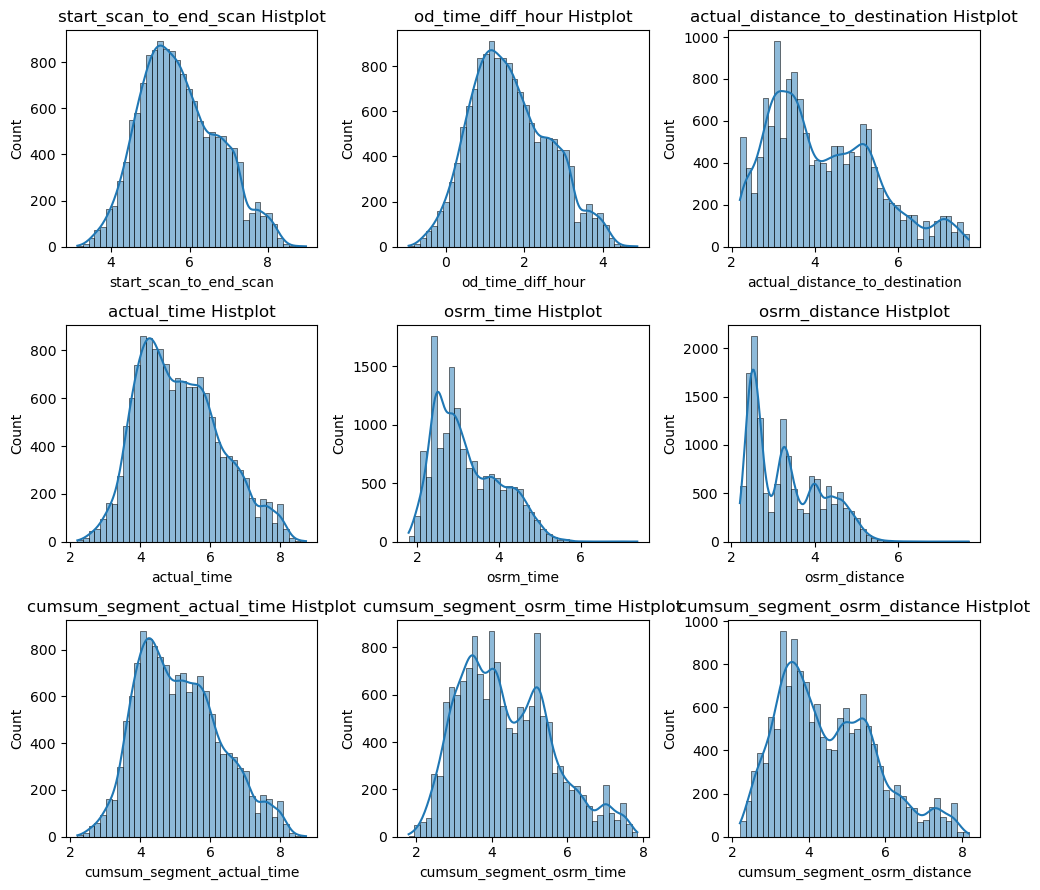

In [42]:
for col in numerical_features:
    transformed_data[col] = np.log(transformed_data[col])

plt.figure(figsize= (10,9))

for i,col in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.histplot(transformed_data[col], kde= True, bins = 40)
    plt.title(f"{col} Histplot")


plt.tight_layout()
plt.show()

In [43]:
# let's know how much space are outliers taking in the data set.

for col in numerical_features:
    q1 = transformed_data[col].quantile(0.25)
    q3 = transformed_data[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    no_of_outliers = len(transformed_data[(transformed_data[col] <= lower_bound )|( transformed_data[col] >= upper_bound)])

    print(f"The \033[1m{col}\033[0m has {no_of_outliers} number of outliers in it")
    percent = no_of_outliers/len(transformed_data)
    print(f"The total pecentage of outliers is {np.round(percent*100,2)}%\n")

The start_scan_to_end_scan has 7 number of outliers in it
The total pecentage of outliers is 0.05%

The od_time_diff_hour has 7 number of outliers in it
The total pecentage of outliers is 0.05%

The actual_distance_to_destination has 0 number of outliers in it
The total pecentage of outliers is 0.0%

The actual_time has 5 number of outliers in it
The total pecentage of outliers is 0.03%

The osrm_time has 14 number of outliers in it
The total pecentage of outliers is 0.09%

The osrm_distance has 9 number of outliers in it
The total pecentage of outliers is 0.06%

The cumsum_segment_actual_time has 5 number of outliers in it
The total pecentage of outliers is 0.03%

The cumsum_segment_osrm_time has 0 number of outliers in it
The total pecentage of outliers is 0.0%

The cumsum_segment_osrm_distance has 0 number of outliers in it
The total pecentage of outliers is 0.0%



In [44]:
# a function to detect outliers and remove them
def detect_outliers(value, col_name):

    value= pd.Series(value)

    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    IQR = q3-q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    outliers = len(value[(value < lower_bound) | (value > upper_bound)])

    print(f"This \033[1m{col_name}\033[0m have {outliers} number of outliers in it which was {np.round((outliers/len(value))*100,2)}% total data")


### One-Hot Encoding of Categorical Features:
- Convert categorical variables into a numerical format using **One-Hot Encoding**.  
- This transformation creates binary columns for each category, making it easier for machine learning models to process categorical data.  
- Example: For a `route_type` feature with categories like "Carting" and "FTL", create separate columns for each, where a `1` indicates the presence of that category, and a `0` indicates absence.

---

### Normalization and Standardization of Numerical Features:
- **Normalization (MinMaxScaler)**:  
  Scale the numerical features to a fixed range (usually [0, 1]). This method is particularly useful when features have different units or magnitudes, ensuring each feature contributes equally to the model.  
  Example: Scaling delivery times from a range of 10 to 1000 to [0, 1].

- **Standardization (StandardScaler)**:  
  Transform the numerical features so they have a mean of 0 and a standard deviation of 1. This is helpful when features follow a Gaussian distribution and when outliers are less of a concern.  
  Example: Standardizing trip durations with a mean of 0 and a variance of 1, making features more comparable for machine learning models.

- Choose between **Normalization** or **Standardization** based on the distribution and scale of the data to prepare it for analysis and modeling.


In [45]:
trip_level_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   source_city                     14787 non-null  category      
 8   source_place                    14787 non-null  category      
 9   source_state                    14787 non-null  category      
 10  destination_center              14787 non-null  object        
 11  de

In [46]:
trip_level_data['data'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14787 entries, 0 to 14786
Series name: data
Non-Null Count  Dtype   
--------------  -----   
14787 non-null  category
dtypes: category(1)
memory usage: 14.7 KB


In [47]:
trip_level_data.describe(include= 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
data,14787,2,training,10645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,14787,NaN,NaN,NaN,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
route_schedule_uuid,14787,1497,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,14787,2,Carting,8906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,14787,14787,trip-153671041653548748,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,14787,930,IND000000ACB,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,14787,714,Gurgaon,1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_place,14787,710,Bilaspur,1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_state,14787,29,Maharashtra,2714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Label Encoding  

**Label Encoding** is a technique used to convert categorical values into numeric labels.

- Label encoding works well only when there are 2 groups in category columns like male-female, training-testing etc
- For other categories we can use TargetEncoding.

In [48]:
from sklearn.preprocessing import LabelEncoder

# get a deep copy to save the original
encoded_trip_level_data = trip_level_data.copy(deep= True)

# Select categorical columns
categorical_features = ['data', 'route_type']

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply one-hot encoding
encoded_trip_level_data['data'] = label_encoder.fit_transform(encoded_trip_level_data['data'])

encoded_trip_level_data['route_type'] = label_encoder.fit_transform(encoded_trip_level_data['route_type'])

encoded_trip_level_data[['data', 'route_type']].value_counts()

data  route_type
1     0             6243
      1             4402
0     0             2663
      1             1479
Name: count, dtype: int64

# Standardization and Normalization  

### Standardization  
**Standardization** is the process of transforming the features of your dataset so that they have a mean of 0 and a standard deviation of 1. This method is especially useful when working with machine learning models that assume the data follows a normal distribution.

In practice, standardization ensures that each feature contributes equally to the model. For example, when dealing with features like age and income, which may have different units and ranges, standardization helps bring them onto a comparable scale.

**Use Case**:  
Standardization is ideal for models such as **linear regression**, **logistic regression**, and **SVMs** that rely on the assumption of normally distributed data.

---

### Normalization  
**Normalization** (or Min-Max Scaling) rescales the data to a fixed range, usually between 0 and 1. This method is useful when the dataset contains features with different scales, and you need all features to be on the same scale for models that are sensitive to the magnitude of the data.

Normalization is often applied when you want to preserve the relationships in the data, especially when working with algorithms like **k-NN** or **k-means clustering**, which use distance-based metrics.

**Use Case**:  
Normalization is typically used when working with models like **neural networks**, where large differences in feature ranges can impact performance.

---
# Normalization

### Best for:
- **Numerical features with varying scales**: For example, features like **income**, **age**, **height**, and **weight** that have different units or ranges.
- **Features with non-normal distributions or bounded ranges**: Such as **percentages** or **ratings** (e.g., ratings from 1 to 5), where the values are constrained within a specific range.

### Avoid for:
- **Categorical or ordinal features**: For example, features like **city names** or **product categories** where relationships are not numerical.
- **Features with outliers**: Outliers can distort the scaling, as normalization compresses all the values into a specific range, which could diminish the impact of the outliers.

---


# Standardization

### Best for:
- **Numerical features with normal or nearly normal distributions**: For example, **test scores** or **sales amounts** where data is close to a normal distribution.
- **Features with varying units**: Such as **temperature in Celsius** or **weight in kilograms** that you want to scale to a common distribution, enabling better comparison between features.

### Avoid for:
- **Categorical or binary features**: Features like **gender** or **country** that don’t benefit from standardization as they are non-numeric.
- **Features with highly skewed distributions**: These may not perform well with standardization, as the process assumes a relatively symmetric distribution for optimal results.

---
## Since Data distributions is not normal or Gaussian Distribution we can apply Normalisation for the numerical Columns

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columns to normalize and standardize
numerical_columns = [
    'start_scan_to_end_scan', 'od_time_diff_hour', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance',
    'cumsum_segment_actual_time', 'cumsum_segment_osrm_time', 'cumsum_segment_osrm_distance'
]

# Initialize scalers
min_max_scaler = MinMaxScaler()

# Apply normalization
normalized_data = min_max_scaler.fit_transform(encoded_trip_level_data[numerical_columns])

normalized_df = pd.DataFrame(normalized_data, columns=[col + '_normalized' for col in numerical_columns])

# Combine with the original data
encoded_trip_level_data = pd.concat([encoded_trip_level_data, normalized_df], axis=1)

# Display the first few rows of the transformed dataset
encoded_trip_level_data.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_city,source_place,source_state,...,cumsum_segment_osrm_distance,start_scan_to_end_scan_normalized,od_time_diff_hour_normalized,actual_distance_to_destination_normalized,actual_time_normalized,osrm_time_normalized,osrm_distance_normalized,cumsum_segment_actual_time_normalized,cumsum_segment_osrm_time_normalized,cumsum_segment_osrm_distance_normalized
0,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Central,Uttar Pradesh,...,1320.4733,0.283937,0.284016,0.374613,0.248242,0.041121,0.038615,0.247388,0.391712,0.373134
1,1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,ChikaDPP,Karnataka,...,84.1894,0.019937,0.020082,0.029476,0.021419,0.007477,0.005575,0.021218,0.023065,0.021373
2,1,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,Haryana,...,2545.2678,0.496508,0.496617,0.880999,0.533568,0.024922,0.022107,0.530301,0.756450,0.721625
3,1,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai,Hub,Maharashtra,...,19.8766,0.009778,0.009782,0.003753,0.007992,0.001869,0.001336,0.008037,0.003909,0.003074
4,1,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,Dc,Karnataka,...,146.7919,0.088127,0.088239,0.054395,0.053069,0.031153,0.028846,0.053207,0.042611,0.039185


In [50]:
encoded_trip_level_data.shape

(14787, 33)

### Doing Hypothesis testing/ visual analysis between actual_time aggregated value(cumsum_segment_actual_time) and osrm time aggregated value(cumsum_segment_osrm_time)

In [51]:
trip_level_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_city,source_place,source_state,...,destination_state,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Central,Uttar Pradesh,...,Uttar Pradesh,2259.0,37.668497,824.732854,1562.0,72.0,93.3217,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,ChikaDPP,Karnataka,...,Karnataka,180.0,3.026865,73.186911,143.0,18.0,21.2177,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,Haryana,...,Haryana,3933.0,65.572709,1927.404273,3347.0,46.0,57.2953,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai,Hub,Maharashtra,...,Maharashtra,100.0,1.674916,17.175274,59.0,9.0,11.9675,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,Dc,Karnataka,...,Karnataka,717.0,11.972484,127.448500,341.0,56.0,72.0035,340.0,115.0,146.7919


In [52]:
detect_outliers(trip_level_data['cumsum_segment_actual_time'],'cumsum_segment_actual_time')

detect_outliers(trip_level_data['cumsum_segment_osrm_time'],'cumsum_segment_osrm_time')

This cumsum_segment_actual_time have 1644 number of outliers in it which was 11.12% total data
This cumsum_segment_osrm_time have 1485 number of outliers in it which was 10.04% total data


In [53]:
trip_level_data.shape

(14787, 24)

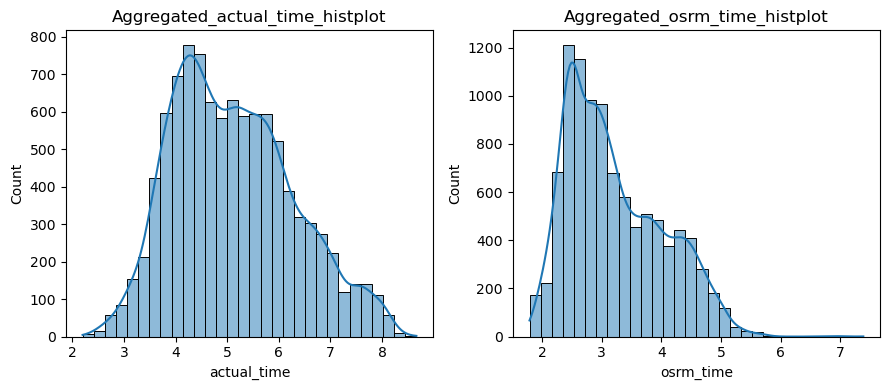

In [54]:
# There are quite a number of outliers so in order to do the tests we can apply log to the series.

aggregated_actual_time = np.log(trip_level_data['actual_time'].sample(10000))

aggregated_osrm_time = np.log(trip_level_data['osrm_time'].sample(10000))

plt.figure(figsize= (9,4))

plt.subplot(1,2,1)
sns.histplot(aggregated_actual_time, bins= 30, kde= True)
plt.title('Aggregated_actual_time_histplot')

plt.subplot(1,2,2)
sns.histplot(aggregated_osrm_time,bins= 30, kde= True)
plt.title('Aggregated_osrm_time_histplot')


plt.tight_layout()
plt.show()

In [55]:
detect_outliers(aggregated_actual_time, 'aggregated_actual_time')
detect_outliers(aggregated_osrm_time, 'aggregated_osrm_time')


This aggregated_actual_time have 2 number of outliers in it which was 0.02% total data
This aggregated_osrm_time have 10 number of outliers in it which was 0.1% total data


## Let's perform Paired T-Test for the two columns
### Paired T- Test: When you are comparing means of two related variableas and data is normally distributed.
### Why Paired T-Test? Let's Understand the assumptions:
- The data should normally distrubuted for both the series
- The samples should be paired
- The data should be continuous
In which the two series satisfies all the conditions we use paired T-Test
---
### Let's Check whether the data satisfies or not using few tests like Shapiro-Wilk test for distribution and levene's test for variance


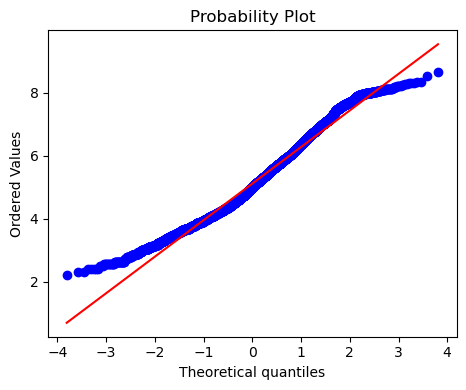

In [56]:
# Before check the distribution of data using QQ plot
plt.figure(figsize= (9,4))

plt.subplot(1,2,1)
stats.probplot(aggregated_actual_time, dist= 'norm', plot= plt)

plt.tight_layout()
plt.show()

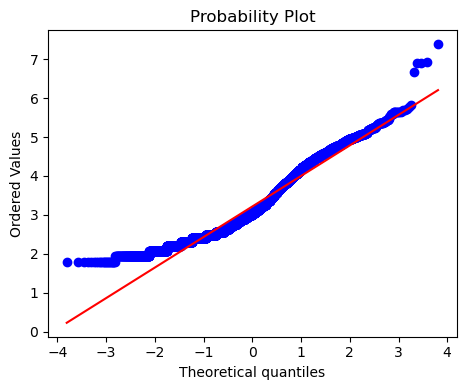

In [57]:
# Before check the distribution of data using QQ plot
plt.figure(figsize= (9,4))

plt.subplot(1,2,1)
stats.probplot(aggregated_osrm_time, dist= 'norm', plot= plt)

plt.tight_layout()
plt.show()

## Shapiro-Wilk Test:
### Null Hypothesis(Ho): The data is not normally distributed
### Alternate Hypothesis(Ha): The data is normally distributed

In [58]:
# perform shapiro's test to verify normal distribution

stat1, p_value1 = stats.shapiro(aggregated_actual_time)
stat2, p_value2 = stats.shapiro(aggregated_osrm_time)

# Print the results
print(f"Shapiro-Wilk test for aggregated_actual_time: Statistic = {stat1}, P-value = {p_value1}")
print(f"Shapiro-Wilk test for  aggregated_osrm_time: Statistic = {stat2}, P-value = {p_value2}")

# Interpret the results for each dataset
def interpret_shapiro(p_value):
    if p_value <= 0.05:
        return "Data is not normally distributed."
    else:
        return "Data is normally distributed."

print("\nInterpretation of results:")
print(f"aggregated_actual_time: {interpret_shapiro(p_value1)}")
print(f"aggregated_osrm_time: {interpret_shapiro(p_value2)}")

Shapiro-Wilk test for aggregated_actual_time: Statistic = 0.9800751805305481, P-value = 4.152019099617392e-35
Shapiro-Wilk test for  aggregated_osrm_time: Statistic = 0.9474515318870544, P-value = 0.0

Interpretation of results:
aggregated_actual_time: Data is not normally distributed.
aggregated_osrm_time: Data is not normally distributed.


 **Key Observation:**
- Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., wilcoxon OR Mann-Whitney U rank test for two independent samples.

In [59]:
trip_level_data.nunique()

data                                  2
trip_creation_time                14787
route_schedule_uuid                1497
route_type                            2
trip_uuid                         14787
source_center                       930
source_name                         930
source_city                         714
source_place                        710
source_state                         29
destination_center                 1035
destination_name                   1035
destination_city                    840
destination_place                   803
destination_state                    31
start_scan_to_end_scan             2203
od_time_diff_hour                 14787
actual_distance_to_destination    14771
actual_time                        1850
osrm_time                           249
osrm_distance                     14413
cumsum_segment_actual_time         1885
cumsum_segment_osrm_time           1240
cumsum_segment_osrm_distance      14724
dtype: int64

## Wilcoxon Signed-Rank Test:
- **The Wilcoxon test is a non-parametric statistical test used in hypothesis testing to compare two related samples or matched pairs when data is not normally distributed.**
- Used to test whether there is a median difference between two related or paired samples
---

## Hypothesis Testing

- **Null Hypothesis (H₀)**:  
  There is no significant difference between two variables.

- **Alternative Hypothesis (H₁)**:  
  There is a significant difference between two variables.

In [60]:
# Perform the Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(aggregated_actual_time, aggregated_osrm_time)

print(f"Wilcoxon statistic: {stat}, p-value: {p_value}")

# Interpret the results
def interpret_wilcoxon(p_value):
    if p_value <= 0.05:
        return "There is a significant difference between the distributions of the two variables."
    else:
        return "There is no significant difference between the distributions of the two variables."

# Interpretation
print(interpret_wilcoxon(p_value))

Wilcoxon statistic: 1293381.0, p-value: 0.0
There is a significant difference between the distributions of the two variables.


### Hypothesis testing between actual_time aggregated value and segment actual time aggregated value to know thier relationship between them. As they are dependent variables we can perform Paired T-Test if all assumptions are satisfied.

In [61]:
trip_level_data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'source_city',
       'source_place', 'source_state', 'destination_center',
       'destination_name', 'destination_city', 'destination_place',
       'destination_state', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'cumsum_segment_actual_time',
       'cumsum_segment_osrm_time', 'cumsum_segment_osrm_distance'],
      dtype='object')

In [62]:
actual_time_aggregated = trip_level_data['actual_time'].sample(10000)
segment_actual_time = trip_level_data['cumsum_segment_actual_time'].sample(10000)

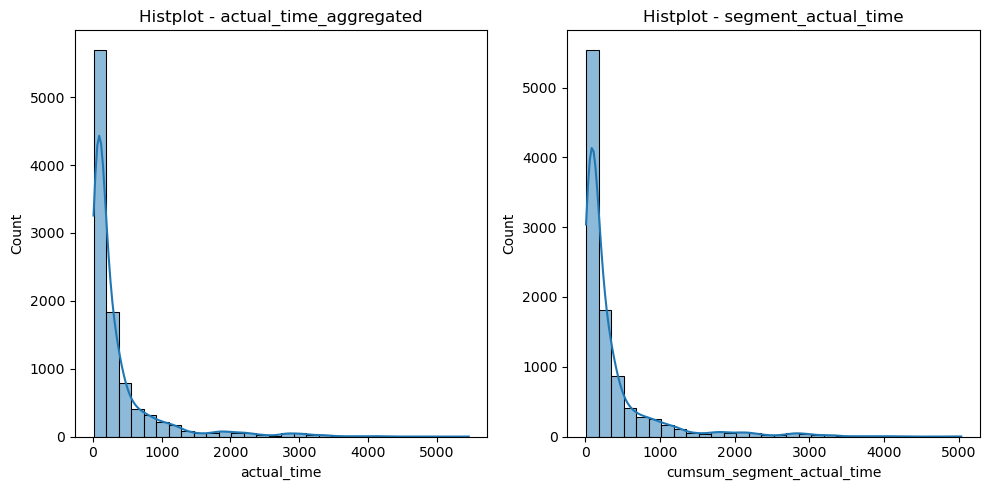

In [63]:
# Let's have some visual analysis to know how the distribution looks like

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.histplot(actual_time_aggregated, kde= True,bins = 30 )
plt.title('Histplot - actual_time_aggregated')

plt.subplot(1,2,2)
sns.histplot(segment_actual_time, kde= True,bins = 30 )
plt.title('Histplot - segment_actual_time')

plt.tight_layout()
plt.show()

In [64]:
# detect outliers

detect_outliers(actual_time_aggregated,'actual_time_aggregated')
detect_outliers(segment_actual_time,'segment_actual_time')

This actual_time_aggregated have 1116 number of outliers in it which was 11.16% total data
This segment_actual_time have 1139 number of outliers in it which was 11.39% total data


The data is extremely left skewed and contains many outliers in it. So we can apply boxcox transformation or log and try to make the data normal.

---
## Box-Cox Transformation

The **Box-Cox transformation** is used to stabilize variance and make data more normal-like.

### Assumptions:
1. The data must be **positive** (no zero or negative values).  
2. It assumes the data can be transformed to approximate **normality**.  


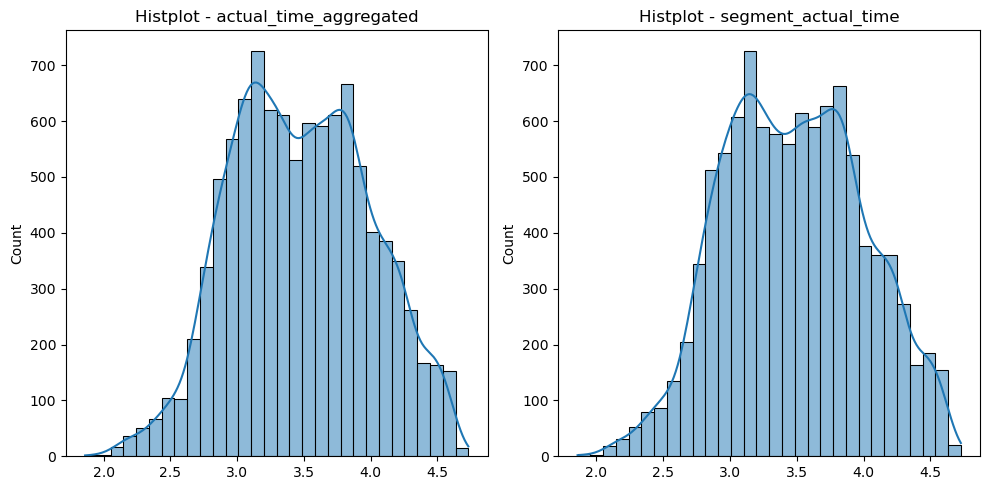

In [65]:
#apply box-cox transformation

transformed_actual_time, lambda_value1 = stats.boxcox(actual_time_aggregated)
transformed_segment_actual_time, lambda_value2 = stats.boxcox(segment_actual_time)

# plotting the data after applying boxcox transformation
plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.histplot(transformed_actual_time, kde= True,bins = 30 )
plt.title('Histplot - actual_time_aggregated')

plt.subplot(1,2,2)
sns.histplot(transformed_segment_actual_time, kde= True,bins = 30 )
plt.title('Histplot - segment_actual_time')

plt.tight_layout()
plt.show()

In [66]:
# data seems to be normal but let's perform few tests to check normality of data

detect_outliers(transformed_actual_time,'transformed_actual_time')
detect_outliers(transformed_segment_actual_time,'transformed_segment_actual_time')


This transformed_actual_time have 1 number of outliers in it which was 0.01% total data
This transformed_segment_actual_time have 2 number of outliers in it which was 0.02% total data


### Let's check normality of data using qqplot an shapiro's test. Later for variance we can perform levene's test.

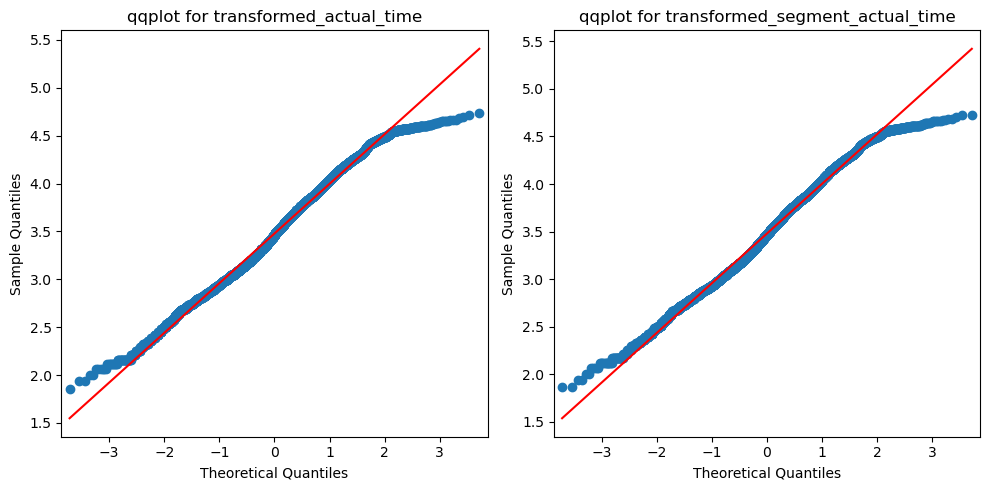

In [67]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
qqplot(transformed_actual_time, line= 's',ax=plt.gca())
plt.title('qqplot for transformed_actual_time')

plt.subplot(1,2,2)
qqplot(transformed_segment_actual_time, line= 's',ax=plt.gca())
plt.title("qqplot for transformed_segment_actual_time")

plt.tight_layout()
plt.show()

### From Q-Q plot the data seems to be approximate normal. To verify wheater data is normally distributed or not we can perform shapiro's normality test.

---
## Shapiro-Wilk Test: Brief Overview

The **Shapiro-Wilk test** is a statistical test used to determine whether a dataset is normally distributed.  
It is widely used because it is highly effective for small sample sizes.

### Hypotheses in Shapiro-Wilk Test

- **Null Hypothesis (H₀)**:  
  The data follows a normal distribution.  

- **Alternative Hypothesis (H₁)**:  
  The data does not follow a normal distribution.  


In [68]:
# Perform Shapiro-Wilk test for aggregated_actual_time
stat, p_value = stats.shapiro(transformed_actual_time)

print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk Statistic: 0.9912139177322388, p-value: 2.369121467271263e-24
Data is not normally distributed.


In [69]:
# Perform Shapiro-Wilk test for transformed_segemt_actual_time
stat, p_value = stats.shapiro(transformed_segment_actual_time)

print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk Statistic: 0.9915910363197327, p-value: 7.807164685772385e-24
Data is not normally distributed.


### In both the cases we can conclude that the data seems to be normally distributed but it is not. In this case we cannot perform paired T-test. although we can perform other non-parametric tests like wilcoxon, mann

### But before that let's check variance by performing levene's test.

## Levene's Test: Brief Overview

The **Levene's test** is a statistical test used to assess the equality of variances (**homoscedasticity**) across different groups.  

### Hypotheses in Levene's Test

- **Null Hypothesis (H₀)**:  
  The variances across the groups are equal (**homoscedasticity**).  

- **Alternative Hypothesis (H₁)**:  
  At least one group's variance is different (**heteroscedasticity**).  


In [70]:
# Perform levene's test

l_stat, p_value = stats.levene(transformed_actual_time,transformed_segment_actual_time)

print(f"Levene Statistic: {l_stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Variances are likely equal across groups.")
else:
    print("Variances are significantly different across groups.")

Levene Statistic: 0.2344187372223143, p-value: 0.6282718849174118
Variances are likely equal across groups.


 **Key Observation:**
- Since the samples do not follow few assumptions T-Test cannot be applied here, we can perform its non parametric equivalent tests like Mann-Whitney U rank test for two independent samples OR  Wilcoxon test for two related samples.

## Wilcoxon Signed-Rank Test: Brief Overview

The **Wilcoxon Signed-Rank Test** is a non-parametric test used to compare two related samples, matched samples, or repeated measurements on the same individuals.  
It is used when the assumptions of the paired t-test (such as normality) are violated.

### Hypotheses in Wilcoxon Signed-Rank Test

- **Null Hypothesis (H₀)**:  
  The median difference between the paired observations is zero (no significant difference).  

- **Alternative Hypothesis (H₁)**:  
  The median difference between the paired observations is not zero (a significant difference exists).  


In [71]:
# Perform Wilcoxon Signed-Rank Test

k_stat, p_value = stats.wilcoxon(transformed_actual_time, transformed_segment_actual_time)

print(f"Wilcoxon Statistic: {k_stat}, p-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("No significant difference between the paired groups.")
else:
    print("Significant difference between the paired groups.")

Wilcoxon Statistic: 24923522.0, p-value: 0.7844171664596464
No significant difference between the paired groups.


### From above test we can conclude that there is no relation between actual time and segment actual time. As they are having significant difference between them.

### Hypothesis testing between OSRM distance aggregated value and segment OSRM distance aggregated value.

In [72]:
trip_level_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_city,source_place,source_state,...,destination_state,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Central,Uttar Pradesh,...,Uttar Pradesh,2259.0,37.668497,824.732854,1562.0,72.0,93.3217,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,ChikaDPP,Karnataka,...,Karnataka,180.0,3.026865,73.186911,143.0,18.0,21.2177,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,Haryana,...,Haryana,3933.0,65.572709,1927.404273,3347.0,46.0,57.2953,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai,Hub,Maharashtra,...,Maharashtra,100.0,1.674916,17.175274,59.0,9.0,11.9675,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,Dc,Karnataka,...,Karnataka,717.0,11.972484,127.448500,341.0,56.0,72.0035,340.0,115.0,146.7919


In [73]:
trip_level_data[['osrm_distance','cumsum_segment_osrm_distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14787.0,40.698444,49.328946,9.0510,12.94055,24.4979,53.29315,2191.4037
cumsum_segment_osrm_distance,14787.0,222.705466,416.846279,9.0729,32.57885,69.7842,216.56060,3523.6324


In [74]:
osrm_distance = trip_level_data['osrm_distance']
segment_osrm_distance = trip_level_data['cumsum_segment_osrm_distance']

In [75]:
# detect outliers
detect_outliers(osrm_distance, 'osrm_distance')
detect_outliers(segment_osrm_distance, 'segment_osrm_distance')


This osrm_distance have 995 number of outliers in it which was 6.73% total data
This segment_osrm_distance have 1550 number of outliers in it which was 10.48% total data


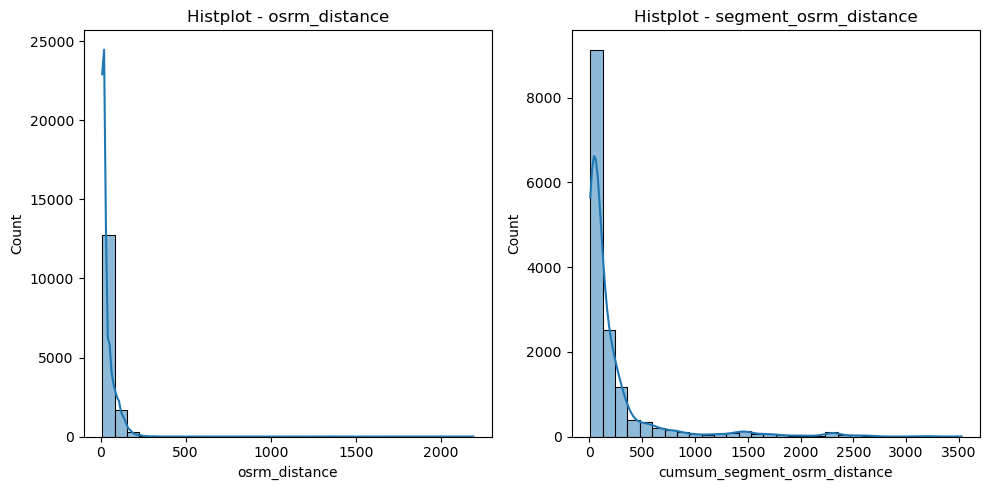

In [76]:
# Let's have some visual analysis to know how the data distribution looks like

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.histplot(osrm_distance, kde= True,bins = 30 )
plt.title('Histplot - osrm_distance')

plt.subplot(1,2,2)
sns.histplot(segment_osrm_distance, kde= True,bins = 30 )
plt.title('Histplot - segment_osrm_distance')

plt.tight_layout()
plt.show()

The data is extremely left skewed and contains many outliers in it. So we can apply boxcox transformation or log and try to make the data normal.

---
## Box-Cox Transformation

The **Box-Cox transformation** is used to stabilize variance and make data more normal-like.

### Assumptions:
1. The data must be **positive** (no zero or negative values).  
2. It assumes the data can be transformed to approximate **normality**.  


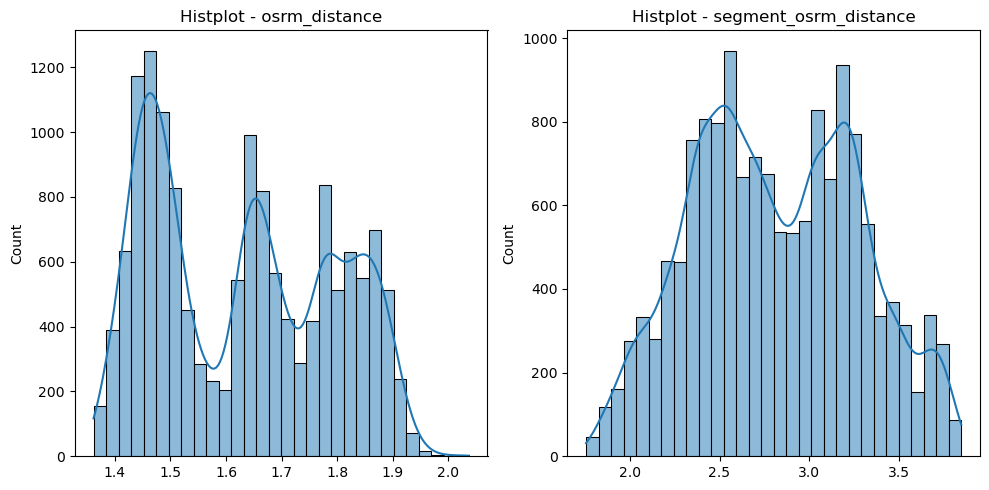

In [77]:
#apply box-cox transformation

transformed_osrm_distance, lambda_value1 = stats.boxcox(osrm_distance)
transformed_segment_osrm_distance, lambda_value2 = stats.boxcox(segment_osrm_distance)

# plotting the data after applying boxcox transformation
plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.histplot(transformed_osrm_distance, kde= True,bins = 30 )
plt.title('Histplot - osrm_distance')

plt.subplot(1,2,2)
sns.histplot(transformed_segment_osrm_distance, kde= True,bins = 30 )
plt.title('Histplot - segment_osrm_distance')

plt.tight_layout()
plt.show()

In [78]:
# detect outliers after transformation
detect_outliers(transformed_osrm_distance, 'osrm_distance')
detect_outliers(transformed_segment_osrm_distance, 'segment_osrm_distance')

This osrm_distance have 0 number of outliers in it which was 0.0% total data
This segment_osrm_distance have 0 number of outliers in it which was 0.0% total data


### Let's check normality of data using qqplot an shapiro's test. Later for variance we can perform levene's test.

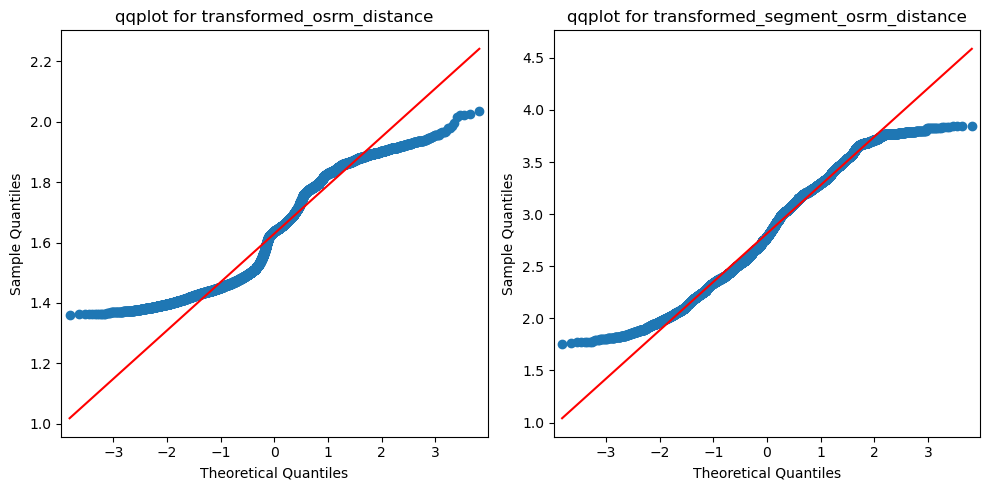

In [79]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
qqplot(transformed_osrm_distance, line= 's',ax=plt.gca())
plt.title('qqplot for transformed_osrm_distance')

plt.subplot(1,2,2)
qqplot(transformed_segment_osrm_distance, line= 's',ax=plt.gca())
plt.title("qqplot for transformed_segment_osrm_distance")

plt.tight_layout()
plt.show()

### To verify wheater data is normally distributed or not we can perform shapiro's normality test.

---
## Shapiro-Wilk Test: Brief Overview

The **Shapiro-Wilk test** is a statistical test used to determine whether a dataset is normally distributed.  
It is widely used because it is highly effective for small sample sizes.

### Hypotheses in Shapiro-Wilk Test

- **Null Hypothesis (H₀)**:  
  The data follows a normal distribution.  

- **Alternative Hypothesis (H₁)**:  
  The data does not follow a normal distribution.  


In [80]:
# Perform Shapiro-Wilk test for transformed_osrm_distance
stat, p_value = stats.shapiro(transformed_osrm_distance)

print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk Statistic: 0.9323399662971497, p-value: 0.0
Data is not normally distributed.


In [81]:
# Perform Shapiro-Wilk test for transformed_segment_osrm_distance
stat, p_value = stats.shapiro(transformed_segment_osrm_distance)

print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk Statistic: 0.9833676815032959, p-value: 4.563222510909864e-38
Data is not normally distributed.


 **Key Observation:**
- Since the samples do not follow any assumptions of T-Test, T-test cannot be applied here, we can perform its non parametric equivalent tests like Mann-Whitney U rank test for two independent samples OR  Wilcoxon test for two related samples.

## Wilcoxon Signed-Rank Test: Brief Overview

The **Wilcoxon Signed-Rank Test** is a non-parametric test used to compare two related samples, matched samples, or repeated measurements on the same individuals.  
It is used when the assumptions of the paired t-test (such as normality) are violated.

### Hypotheses in Wilcoxon Signed-Rank Test

- **Null Hypothesis (H₀)**:  
  The median difference between the paired observations is zero (no significant difference).  

- **Alternative Hypothesis (H₁)**:  
  The median difference between the paired observations is not zero (a significant difference exists).  


In [82]:
# Perform Wilcoxon Signed-Rank Test

k_stat, p_value = stats.wilcoxon(transformed_osrm_distance, transformed_segment_osrm_distance)

print(f"Wilcoxon Statistic: {k_stat}, p-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("No significant difference between the paired groups.")
else:
    print("Significant difference between the paired groups.")

Wilcoxon Statistic: 0.0, p-value: 0.0
Significant difference between the paired groups.


### Doing Hypothesis testing/ visual analysis between OSRM time aggregated value and segment OSRM time aggregated value.

In [83]:
trip_level_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_city,source_place,source_state,...,destination_state,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumsum_segment_actual_time,cumsum_segment_osrm_time,cumsum_segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Central,Uttar Pradesh,...,Uttar Pradesh,2259.0,37.668497,824.732854,1562.0,72.0,93.3217,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,ChikaDPP,Karnataka,...,Karnataka,180.0,3.026865,73.186911,143.0,18.0,21.2177,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,Haryana,...,Haryana,3933.0,65.572709,1927.404273,3347.0,46.0,57.2953,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai,Hub,Maharashtra,...,Maharashtra,100.0,1.674916,17.175274,59.0,9.0,11.9675,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary,Dc,Karnataka,...,Karnataka,717.0,11.972484,127.448500,341.0,56.0,72.0035,340.0,115.0,146.7919


In [84]:
trip_level_data[['osrm_time','cumsum_segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14787.0,36.193887,41.555735,6.0,13.0,21.0,45.0,1611.0
cumsum_segment_osrm_time,14787.0,180.511598,314.679279,6.0,30.0,65.0,184.0,2564.0


In [85]:
osrm_time = trip_level_data['osrm_time']
segment_osrm_time = trip_level_data['cumsum_segment_osrm_time']

# detect outliers
detect_outliers(osrm_distance, 'osrm_distance')
detect_outliers(segment_osrm_distance, 'segment_osrm_distance')

This osrm_distance have 995 number of outliers in it which was 6.73% total data
This segment_osrm_distance have 1550 number of outliers in it which was 10.48% total data


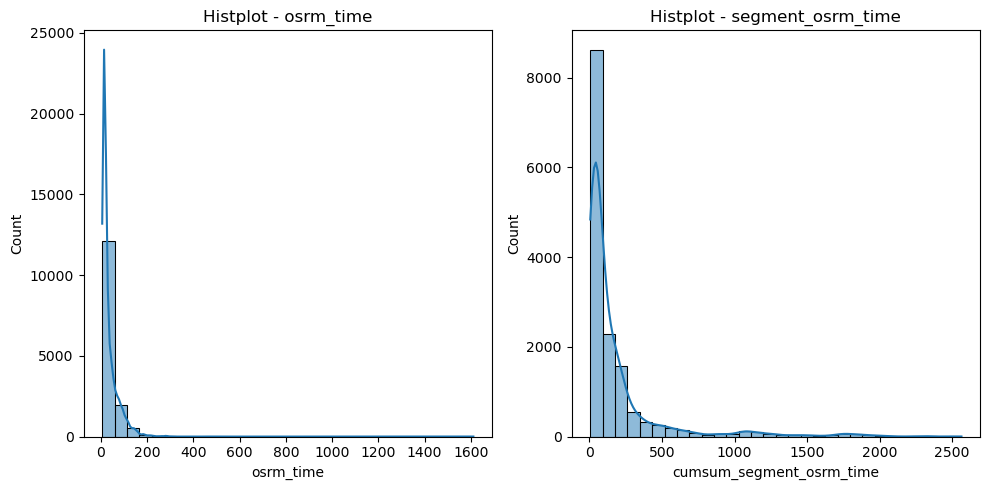

In [86]:
# Let's have some visual analysis to know how the data distribution looks like

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.histplot(osrm_time, kde= True,bins = 30 )
plt.title('Histplot - osrm_time')

plt.subplot(1,2,2)
sns.histplot(segment_osrm_time, kde= True,bins = 30 )
plt.title('Histplot - segment_osrm_time')

plt.tight_layout()
plt.show()

The data is extremely left skewed and contains many outliers in it. So we can apply boxcox transformation or log and try to make the data normal.

---
## Applying Log Transformation

### 1. Skewed Distributions:
- Log transformations are effective when the data is **right-skewed**, where a few high values distort the distribution (e.g., income, sales data).

### 2. Reducing Variability:
- When data varies significantly (e.g., wide range of values), applying a log transformation can help **stabilize the variance**, making patterns more visible.

### 3. Dealing with Outliers:
- Large outliers can be **compressed** into a more manageable range after a log transformation.

---

## How Log Transformation Works:
- The **log transformation** reduces large values and expands smaller ones, bringing the distribution closer to normality, which is often an assumption in statistical models.



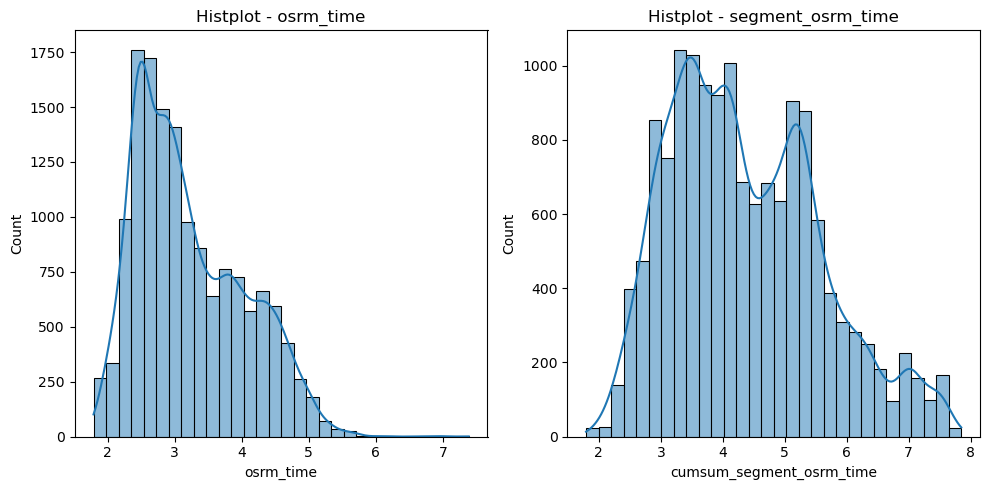

In [87]:
osrm_time = np.log(osrm_time)
segment_osrm_time = np.log(segment_osrm_time)

# Let's have some visual analysis to know how the data distribution looks like

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.histplot(osrm_time, kde= True,bins = 30 )
plt.title('Histplot - osrm_time')

plt.subplot(1,2,2)
sns.histplot(segment_osrm_time, kde= True,bins = 30 )
plt.title('Histplot - segment_osrm_time')

plt.tight_layout()
plt.show()


In [88]:
# detect outliers after transformation
detect_outliers(osrm_time, 'osrm_time')
detect_outliers(segment_osrm_time, 'segment_osrm_time')

This osrm_time have 14 number of outliers in it which was 0.09% total data
This segment_osrm_time have 0 number of outliers in it which was 0.0% total data


In [89]:
# remove outlier from the series

def remove_outliers(value, col_name= "column"):
    value= pd.Series(value)

    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    IQR = q3-q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    rows = len(value)
    before_outliers = len(value[(value < lower_bound) | (value > upper_bound)])

#     print(f"This \033[1m{col_name}\033[0m have {outliers} number of outliers in it which was {np.round((outliers/len(value))*100,2)}% total data")

    value = value[(value >= lower_bound) & (value <= upper_bound)]
    after_outliers = len(value[(value < lower_bound) | (value > upper_bound)])

#     print(f"This \033[1m{col_name}\033[0m have {before_outliers} number of outliers before transformation and {after_outliers} after transformation.")


    return f"This {col_name} have {before_outliers} number of outliers before transformation and {after_outliers} after transformation and remaining rows are {value.shape[0]} of {rows} total number of rows"

remove_outliers(osrm_time, 'osrm_time')


'This osrm_time have 14 number of outliers before transformation and 0 after transformation and remaining rows are 14773 of 14787 total number of rows'

In [90]:
osrm_time = osrm_time.sample(14000)
segment_osrm_time = segment_osrm_time.sample(14000)

### Let's check normality of data using qqplot an shapiro's test. Later for variance we can perform levene's test.


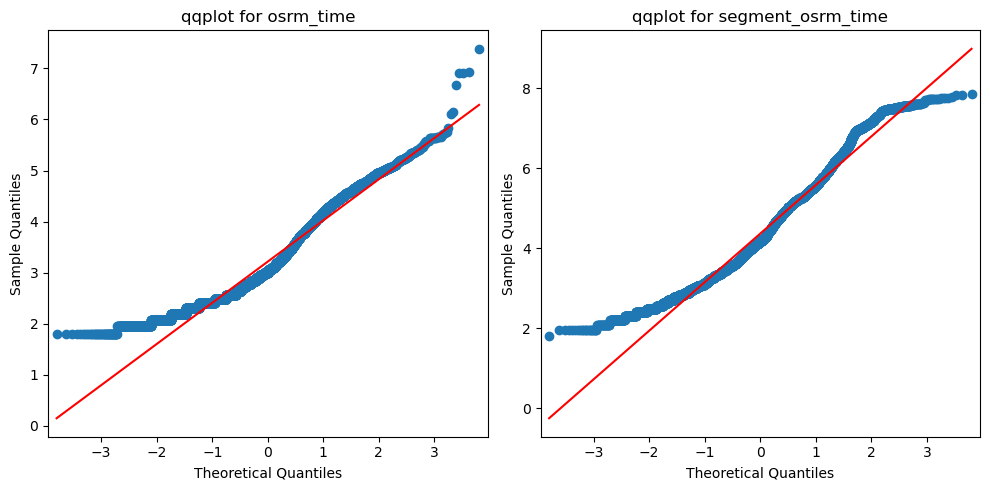

In [91]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
qqplot(osrm_time, line= 's',ax=plt.gca())
plt.title('qqplot for osrm_time')

plt.subplot(1,2,2)
qqplot(segment_osrm_time, line= 's',ax=plt.gca())
plt.title("qqplot for segment_osrm_time")

plt.tight_layout()
plt.show()

### To verify wheater data is normally distributed or not we can perform shapiro's normality test.

---
## Shapiro-Wilk Test: Brief Overview

The **Shapiro-Wilk test** is a statistical test used to determine whether a dataset is normally distributed.  
It is widely used because it is highly effective for small sample sizes.

### Hypotheses in Shapiro-Wilk Test

- **Null Hypothesis (H₀)**:  
  The data follows a normal distribution.  

- **Alternative Hypothesis (H₁)**:  
  The data does not follow a normal distribution.  


In [92]:
# Perform Shapiro-Wilk test for osrm_time
stat, p_value = stats.shapiro(osrm_time)

print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk Statistic: 0.9474644660949707, p-value: 0.0
Data is not normally distributed.


In [93]:
# Perform Shapiro-Wilk test for segment_osrm_time
stat, p_value = stats.shapiro(segment_osrm_time)

print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# Interpret results
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Shapiro-Wilk Statistic: 0.9696999192237854, p-value: 0.0
Data is not normally distributed.


 **Key Observation:**
- Since the samples do not follow any assumptions of T-Test, T-test cannot be applied here, we can perform its non parametric equivalent tests like Mann-Whitney U rank test for two independent samples OR  Wilcoxon test for two related samples.

## Wilcoxon Signed-Rank Test: Brief Overview

The **Wilcoxon Signed-Rank Test** is a non-parametric test used to compare two related samples, matched samples, or repeated measurements on the same individuals.  
It is used when the assumptions of the paired t-test (such as normality) are violated.

### Hypotheses in Wilcoxon Signed-Rank Test

- **Null Hypothesis (H₀)**:  
  The median difference between the paired observations is zero (no significant difference).  

- **Alternative Hypothesis (H₁)**:  
  The median difference between the paired observations is not zero (a significant difference exists).  


In [94]:
# Perform Wilcoxon Signed-Rank Test

k_stat, p_value = stats.wilcoxon(osrm_time, segment_osrm_time)

print(f"Wilcoxon Statistic: {k_stat}, p-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("No significant difference between the paired groups.")
else:
    print("Significant difference between the paired groups.")

Wilcoxon Statistic: 12565842.0, p-value: 0.0
Significant difference between the paired groups.


### **Delhivery Business Case Study: Overall Summary**

---

#### **Insights:**
1. **Operational Inefficiencies:**
   - Significant differences between predicted (OSRM) and actual delivery times highlight inefficiencies in route planning and execution.
   - High-demand routes, such as those involving **Gurgaon** and **Mumbai**, dominate operations, making them critical zones for optimization.

2. **Skewed Data Distribution:**
   - Delivery time and distance data are **left-skewed**, indicating potential outliers or inconsistencies that may impact decision-making accuracy.

3. **Frequent Route Usage:**
   - Some routes are used up to **53 times**, and **"Carting"** is the most common route type. Optimizing these high-frequency operations can significantly improve cost efficiency.

4. **Regional Concentration:**
   - **Maharashtra** emerges as a key region, serving as both a frequent source and destination, suggesting a need for focused resource allocation and operational improvements.

5. **Unique Trips:**
   - Each trip has a unique identifier, offering an opportunity to track performance granularly and identify bottlenecks or inefficiencies.

6. **Minimal Data Gaps:**
   - Null values and unknown columns have a negligible impact (<0.2%) and can be addressed with minimal effort.

---

#### **Observations:**
1. **Prediction vs. Reality Gap:**
   - OSRM models fail to capture real-world conditions accurately, leading to mismatches in predicted and actual delivery times.

2. **High-Demand Areas Drive Costs:**
   - High delivery volumes in cities like **Mumbai** and states like **Maharashtra** may strain resources without optimized processes.

3. **Data Transformation Success:**
   - Transformations like **log** and **Box-Cox** effectively addressed skewness, enabling better insights for decision-making.

---

#### **Actionable Items for Profitability:**

1. **Optimize Route Planning:**
   - Refine the **OSRM model** or adopt **machine learning-based solutions** to account for real-world delays, improving delivery time predictions.
   - Focus optimization efforts on the most frequently used routes and high-demand areas.

2. **Invest in High-Impact Regions:**
   - Strategically allocate resources to hubs like **Gurgaon** and **Mumbai**, ensuring infrastructure, manpower, and fleet capacities meet demand.

3. **Enhance Data Utilization:**
   - Leverage unique trip identifiers for granular performance analysis to pinpoint inefficiencies.
   - Implement **geospatial analytics** to visualize delivery routes and optimize fleet allocation.

4. **Improve Operational Efficiency:**
   - Prioritize **"Carting" route types** for process improvements, as they represent the majority of operations.
   - Address inefficiencies in low-frequency routes to reduce unnecessary costs.

5. **Ensure Data Consistency:**
   - Regularly audit and clean data to ensure accuracy, focusing on correcting mismatched source and destination locations.

6. **Regional Focus:**
   - Concentrate operational improvements in **Maharashtra**, given its high delivery volume. Establish dedicated teams or resources for this region.

7. **Strategic Investments:**
   - Invest in technology such as **route optimization tools** and **predictive analytics**, along with workforce training, to enhance reliability and customer satisfaction.

---

By addressing inefficiencies and leveraging data insights effectively, **Delhivery** can streamline operations, reduce costs, and achieve greater profitability in its logistics and delivery services.
